# Mapeamento de patentes

## Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Banco limpo

In [2]:
# Exporte o DataFrame para o arquivo Excel
df = pd.read_excel('dados_parceiros_longo_completo.xlsx')

df['data_publicacao'] = pd.to_datetime(df['data_publicacao'], format="%d/%m/%Y")
df['data_deposito'] = pd.to_datetime(df['data_deposito'], format="%d/%m/%Y")

df['ifes'] = df['ifes'].astype('category')
df['parceria'] = df['parceria'].astype('category')

print(df.head())
print(df.info)

   Unnamed: 0       ID data_publicacao diretoria  numero_revista  codigo  \
0           0  ID00001      2020-01-07   Patente            2557     3.1   
1           1  ID00002      2020-01-07   Patente            2557     3.1   
2           2  ID00003      2020-01-07   Patente            2557     3.1   
3           3  ID00004      2020-01-07   Patente            2557     3.1   
4           4  ID00005      2020-01-07   Patente            2557     3.1   

                                              titulo               numero  \
0  Publicação do Pedido de Patente ou de Certific...  BR 10 2013 016644-8   
1  Publicação do Pedido de Patente ou de Certific...  BR 10 2014 001105-6   
2  Publicação do Pedido de Patente ou de Certific...  BR 10 2017 004929-9   
3  Publicação do Pedido de Patente ou de Certific...  BR 10 2017 024659-0   
4  Publicação do Pedido de Patente ou de Certific...  BR 10 2017 026178-6   

  data_deposito data_prioridade  ... responsavel31 responsavel32  \
0    2013-06

### Exploração das datas

In [3]:
print(df["data_publicacao"].min())
print(df["data_publicacao"].max())

print(df["data_deposito"].min())
print(df["data_deposito"].max())

2020-01-07 00:00:00
2023-07-25 00:00:00
2003-05-20 00:00:00
2023-01-11 00:00:00


### Total de patentes depositadas no período

In [4]:
tab = df.groupby('ifes', observed=True).agg(n=('ID', 'nunique')).reset_index()
tab

,ifes,n
0,Não,20935
1,Sim,3779


### Distribuição do total de patentes depositadas entre 20/05/2003 e 11/01/2023 por participação de IFEs

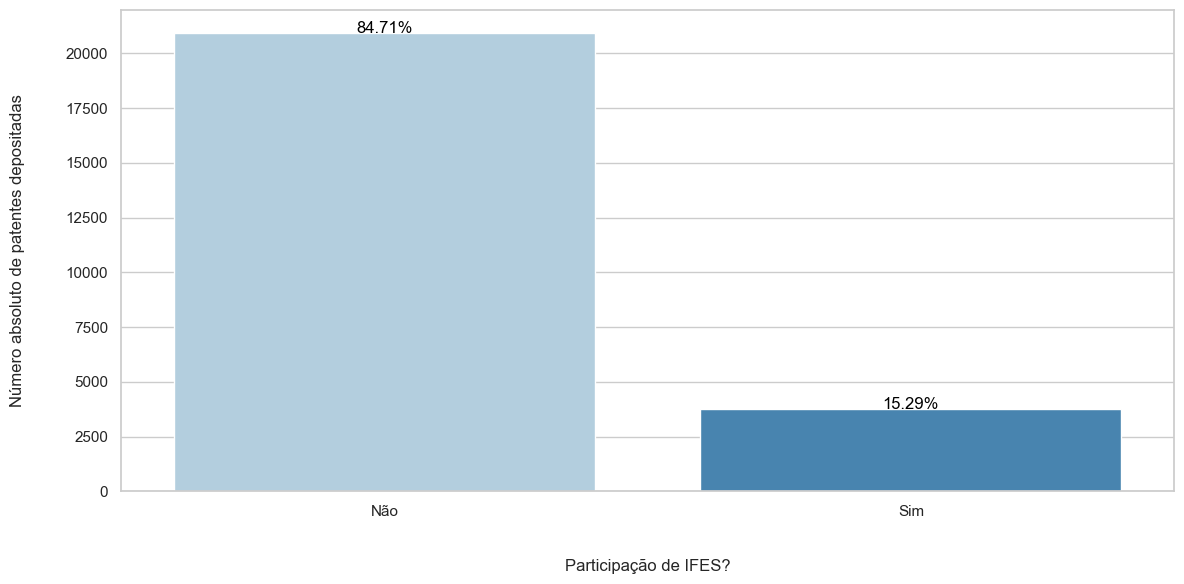

In [5]:
# Agrupe os dados e conte IDs distintos em cada categoria da coluna 'ifes'
counts = df.groupby('ifes', observed=True)['ID'].nunique().reset_index()

# Calcule o total de IDs distintos
total = counts['ID'].sum()

# Calcule as porcentagens
counts['Percentage'] = (counts['ID'] / total * 100).round(2)

# Crie o gráfico de barras com Seaborn
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  # Estilo de fundo

# Crie o gráfico de barras com as porcentagens
barplot = sns.barplot(x='ifes', y='ID', hue='ifes', data=counts, palette="Blues", legend=False)

# Adicione as porcentagens sobre as barras
for index, row in counts.iterrows():
    barplot.text(row.name, row['ID'], f"{row['Percentage']}%", color='black', ha="center")

plt.xticks(rotation=0)  # Rotacione os rótulos no eixo x para melhor legibilidade
plt.xlabel('\n\nParticipação de IFES?')
plt.ylabel('Número absoluto de patentes depositadas\n\n')
#plt.title('Distribuição das patentes depositadas entre 20/05/2003 e 11/01/2023 por participação de IFEs')

# Mostre o gráfico
plt.tight_layout()
plt.show()


### Relação entre a data de pubicação da revista e data de depósito de patente

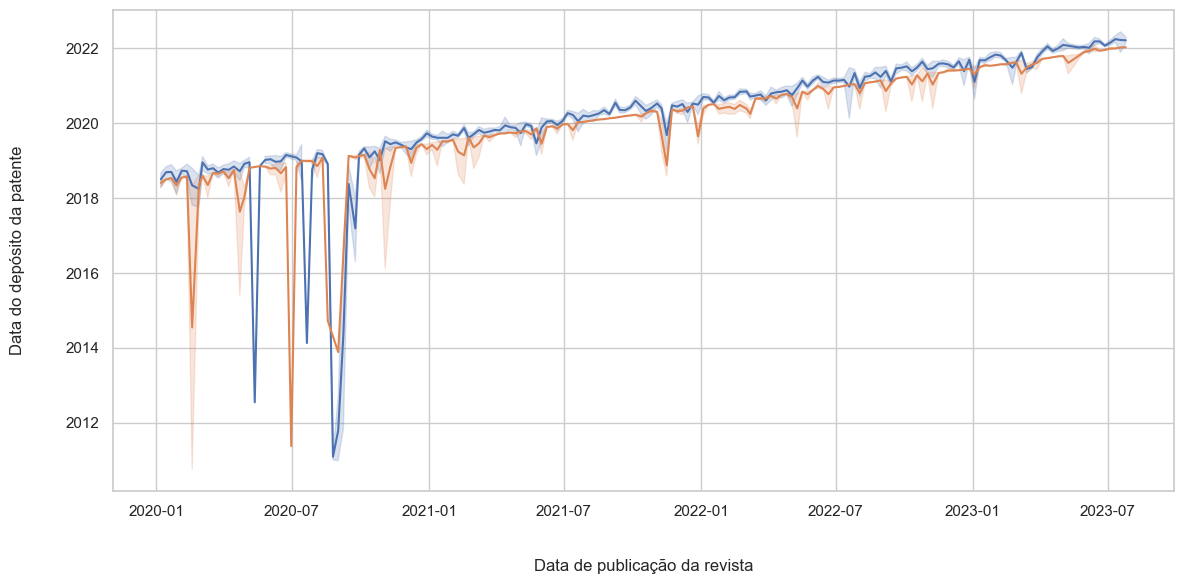

In [6]:
# Crie o gráfico de barras com Seaborn
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  # Estilo de fundo

# Crie o gráfico de barras com as porcentagens
sns.lineplot(x='data_publicacao', y='data_deposito', hue='ifes', data=df, legend=False)

plt.xticks(rotation=0)  # Rotacione os rótulos no eixo x para melhor legibilidade
plt.xlabel('\n\nData de publicação da revista')
plt.ylabel('Data do depósito da patente\n\n')
#plt.title('')

# Mostre o gráfico
plt.tight_layout()
plt.show()


### Patentes depositadas entre 20/05/2003 e 11/01/2023 por data de depósito e segundo participação de IFEs

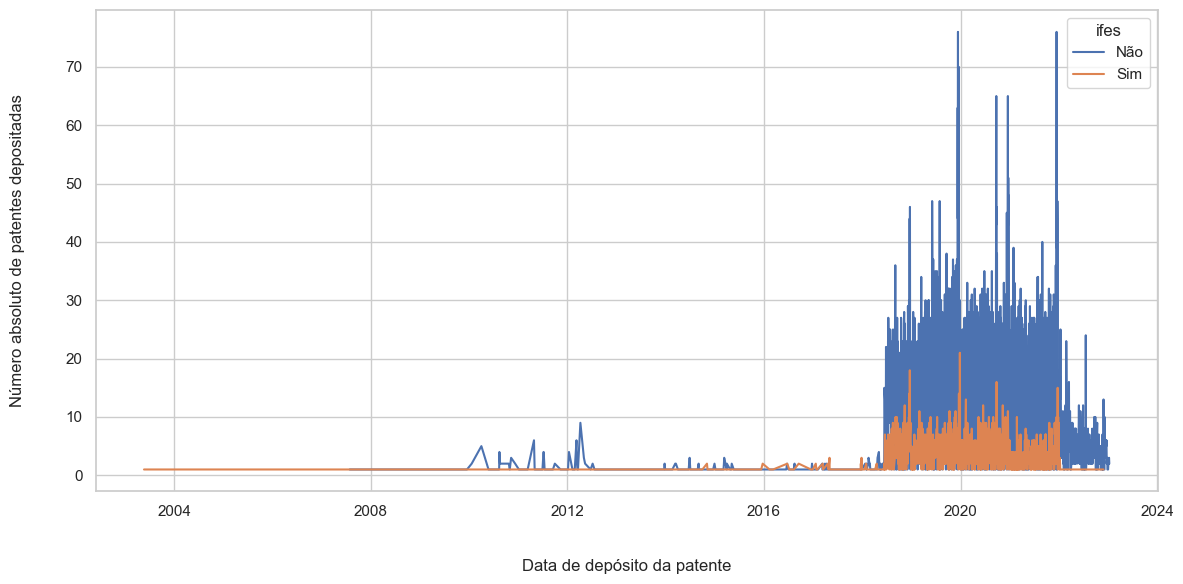

In [7]:
# Agrupe os dados e conte IDs distintos em cada categoria da coluna 'ifes'
counts = df.groupby(['data_deposito', 'ifes'], observed=True)['ID'].nunique().reset_index()

# Crie o gráfico de barras com Seaborn
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  # Estilo de fundo

# Crie o gráfico de barras com as porcentagens
sns.lineplot(x='data_deposito', y='ID', hue='ifes', data=counts)

plt.xticks(rotation=0)  # Rotacione os rótulos no eixo x para melhor legibilidade
plt.xlabel('\n\nData de depósito da patente')
plt.ylabel('Número absoluto de patentes depositadas\n\n')
#plt.title('')

# Mostre o gráfico
plt.tight_layout()
plt.show()

### Patentes depositadas entre 01/01/2020 e 11/01/2023 por data de depósito e segundo participação de IFEs

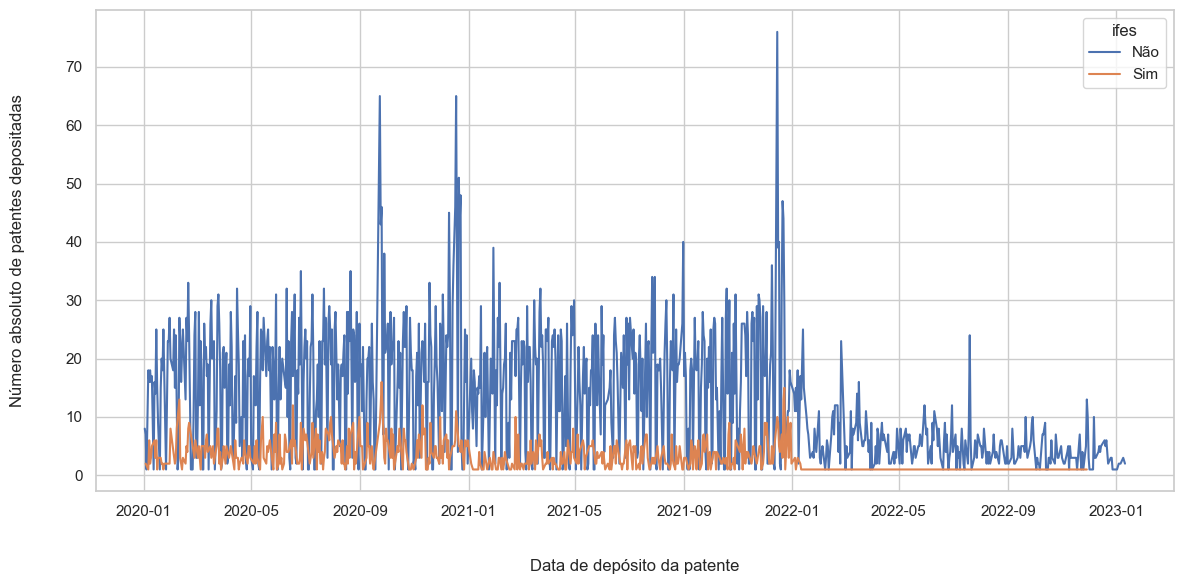

In [8]:
# Agrupe os dados e conte IDs distintos em cada categoria da coluna 'ifes'
counts = df.groupby(['data_deposito', 'ifes'], observed=True)['ID'].nunique().reset_index()

counts = counts.loc[counts['data_deposito'] >= '2020-01-01'].copy()
# Crie o gráfico de barras com Seaborn
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  # Estilo de fundo

# Crie o gráfico de barras com as porcentagens
sns.lineplot(x='data_deposito', y='ID', hue='ifes', data=counts)

plt.xticks(rotation=0)  # Rotacione os rótulos no eixo x para melhor legibilidade
plt.xlabel('\n\nData de depósito da patente')
plt.ylabel('Número absoluto de patentes depositadas\n\n')
#plt.title('')

# Mostre o gráfico
plt.tight_layout()
plt.show()

### Distribuição das patentes depositadas por IFEs entre 20/05/2003 e 11/01/2023 por data de depósito e segundo condição de participação de IFEs

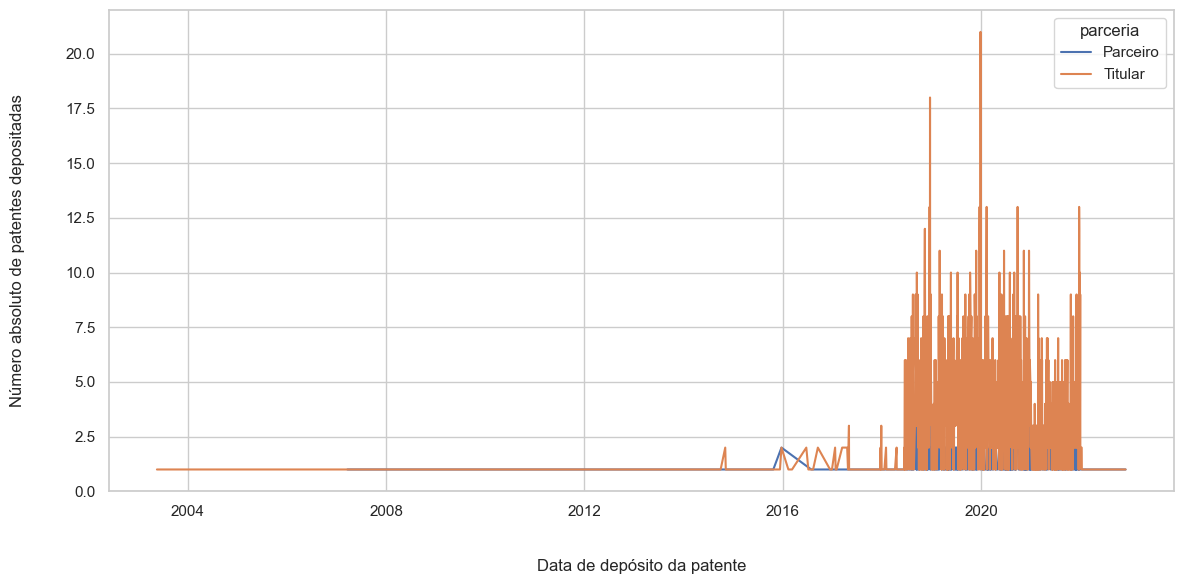

In [9]:
# Agrupe os dados e conte IDs distintos em cada categoria da coluna 'ifes'
counts = df.loc[pd.notna(df['ifes']) & (df['ifes'] == 'Sim')].copy()
counts = counts.groupby(['data_deposito', 'parceria'], observed=True)['ID'].nunique().reset_index()

# Crie o gráfico de barras com Seaborn
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  # Estilo de fundo

# Crie o gráfico de barras com as porcentagens
sns.lineplot(x='data_deposito', y='ID', hue='parceria', data=counts)

plt.xticks(rotation=0)  # Rotacione os rótulos no eixo x para melhor legibilidade
plt.xlabel('\n\nData de depósito da patente')
plt.ylabel('Número absoluto de patentes depositadas\n\n')
#plt.title('')

# Mostre o gráfico
plt.tight_layout()
plt.show()

### Distribuição das patentes depositadas por IFEs entre 20/05/2003 e 01/01/2020 por data de depósito e segundo condição de participação de IFEs

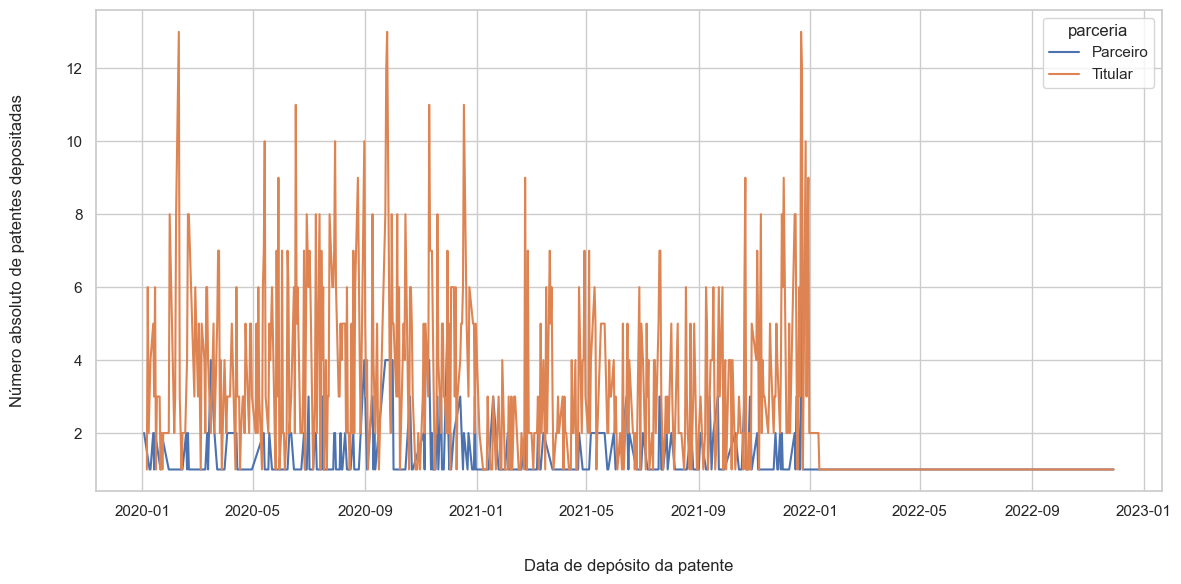

In [10]:
# Agrupe os dados e conte IDs distintos em cada categoria da coluna 'ifes'
counts = df.loc[pd.notna(df['ifes']) & (df['ifes'] == 'Sim') & (df['data_deposito'] >= '2020-01-01')].copy()
counts = counts.groupby(['data_deposito', 'parceria'], observed=True)['ID'].nunique().reset_index()

# Crie o gráfico de barras com Seaborn
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  # Estilo de fundo

# Crie o gráfico de barras com as porcentagens
sns.lineplot(x='data_deposito', y='ID', hue='parceria', data=counts)

plt.xticks(rotation=0)  # Rotacione os rótulos no eixo x para melhor legibilidade
plt.xlabel('\n\nData de depósito da patente')
plt.ylabel('Número absoluto de patentes depositadas\n\n')
#plt.title('')

# Mostre o gráfico
plt.tight_layout()
plt.show()